In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

C:\Users\thinkpad\anaconda3\envs\r-tutorial\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# Explore global dataset

In [2]:
df = pd.read_excel('S&P Global rated companies.xlsx')

In [3]:
df.head()

,SP_ENTITY_NAME,SP_ENTITY_ID,RD_CREDIT_RATING_GLOBAL,RD_CREDIT_RATING_GLOBAL.1,SP_TICKER,SP_EXCHANGE,SP_ISIN,SP_GEOGRAPHY,SP_COUNTRY_NAME,SP_COUNTRY_CODE,IQ_INDUSTRY_GROUP
0,"""TEMIRYO'L-SUG'URTA"" LLC",20023199,NaN,B+,NaN,NaN,NaN,Europe,Uzbekistan,UZ,Insurance
1,"""TransteleCom"" JSC",7661998,B,B,NaN,NaN,NaN,Europe,Kazakhstan,KZ,Telecommunication Services
2,1011778 B.C. Unlimited Liability Company,6561202,BB,BB,NaN,NaN,NaN,United States and Canada,Canada,CA,Consumer Services
3,21st Century Casualty Company,16700,NaN,A,NaN,NaN,NaN,United States and Canada,USA,US,Insurance
4,21st Century Centennial Insurance Company,12057,NaN,A,NaN,NaN,NaN,United States and Canada,USA,US,Insurance


In [4]:
df.columns

Index(['SP_ENTITY_NAME', 'SP_ENTITY_ID', 'RD_CREDIT_RATING_GLOBAL',
       'RD_CREDIT_RATING_GLOBAL.1', 'SP_TICKER', 'SP_EXCHANGE', 'SP_ISIN',
       'SP_GEOGRAPHY', 'SP_COUNTRY_NAME', 'SP_COUNTRY_CODE',
       'IQ_INDUSTRY_GROUP'],
      dtype='object')

In [5]:
df.shape

(8957, 11)

# Explore global listed dataset

In [6]:
listed_df = df[df['SP_TICKER'].notnull()]
listed_df.head()

,SP_ENTITY_NAME,SP_ENTITY_ID,RD_CREDIT_RATING_GLOBAL,RD_CREDIT_RATING_GLOBAL.1,SP_TICKER,SP_EXCHANGE,SP_ISIN,SP_GEOGRAPHY,SP_COUNTRY_NAME,SP_COUNTRY_CODE,IQ_INDUSTRY_GROUP
13,3i Group plc (LSE:III),4147418,BBB+,BBB+,III,LSE,GB00B1YW4409,Europe,United Kingdom,GB,Financial Services
14,3M Company (NYSE:MMM),105135,BBB+,BBB+,MMM,NYSE,US88579Y1010,United States and Canada,USA,US,Capital Goods
15,3R Petroleum Óleo e Gás S.A. (BOVESPA:RRRP3),7163456,B+,B+,RRRP3,BOVESPA,BRRRRPACNOR5,Latin America and Caribbean,Brazil,BR,Energy
20,888 Holdings plc (LSE:888),4988507,B,B,888,LSE,GI000A0F6407,Europe,Gibraltar,GI,Consumer Services
24,A.P. Møller - Mærsk A/S (CPSE:MAERSK B),4232116,BBB+,BBB+,MAERSK B,CPSE,DK0010244508,Europe,Denmark,DK,Transportation


In [7]:
listed_df.shape

(2522, 11)

In [8]:
listed_df['SP_EXCHANGE'].unique()

array(['LSE', 'NYSE', 'BOVESPA', 'CPSE', 'BIT', 'OM', 'NSEL', 'SWX',
       'ENXTAM', 'ADX', 'NASDAQGS', 'ENXTPA', 'BME', 'NSEI', 'NASDAQCM',
       'OB', 'XTRA', 'SET', 'ENXTBR', 'TSE', 'SNSE', 'SEHK', 'ISE', 'TSX',
       'HLSE', 'DSM', 'SASE', 'KWSE', 'BMV', 'WSE', 'ATSE', 'ASX', 'IBSE',
       'NASDAQGM', 'BAX', 'BVMT', 'ICSE', 'CBSE', 'NZSE', 'KLSE', 'BSE',
       'BVL', 'ENXTLS', 'BVC', 'BASE', 'TASE', 'MSM', 'CSE', 'PSE',
       'MTSE', 'SHSE', 'SZSE', 'DSE', 'AIM', 'OTCPK', 'SGX', 'TWSE',
       'BATS', 'PSGM', 'SEP', 'CASE', 'KOSE', 'BVB', 'OTCQB', 'NGSE',
       'DFM', 'OTCEM', 'WBAG', 'TTSE', 'JSE', 'KAS', 'DB', 'NYSEAM',
       'HMSE', 'HOSE', 'ASE', 'BUSE', 'LJSE', 'IDX', 'OTCQX', 'TPEX'],
      dtype=object)

# Explore global listed US dataset

In [9]:
listed_df['SP_GEOGRAPHY'].unique()

array(['Europe', 'United States and Canada',
       'Latin America and Caribbean', 'Middle East', 'Asia-Pacific',
       'Africa'], dtype=object)

In [10]:
listed_US_df = listed_df[listed_df['SP_COUNTRY_NAME']=='USA'].reset_index(drop = True)
listed_US_df.head()

,SP_ENTITY_NAME,SP_ENTITY_ID,RD_CREDIT_RATING_GLOBAL,RD_CREDIT_RATING_GLOBAL.1,SP_TICKER,SP_EXCHANGE,SP_ISIN,SP_GEOGRAPHY,SP_COUNTRY_NAME,SP_COUNTRY_CODE,IQ_INDUSTRY_GROUP
0,3M Company (NYSE:MMM),105135,BBB+,BBB+,MMM,NYSE,US88579Y1010,United States and Canada,USA,US,Capital Goods
1,AAR Corp. (NYSE:AIR),4157610,BB+,BB+,AIR,NYSE,US0003611052,United States and Canada,USA,US,Capital Goods
2,Abbott Laboratories (NYSE:ABT),4004092,AA-,AA-,ABT,NYSE,US0028241000,United States and Canada,USA,US,Health Care Equipment and Services
3,AbbVie Inc. (NYSE:ABBV),4558282,A-,A-,ABBV,NYSE,US00287Y1091,United States and Canada,USA,US,"Pharmaceuticals, Biotechnology and Life Sciences"
4,Abercrombie & Fitch Co. (NYSE:ANF),4066681,BB-,BB-,ANF,NYSE,US0028962076,United States and Canada,USA,US,Consumer Discretionary Distribution and Retail


In [11]:
listed_US_df.shape

(1163, 11)

# Get US dollars tickers

In [12]:
listed_US_dollar_df = listed_US_df[listed_US_df['SP_EXCHANGE'].isin(['NYSE', 'NASDAQGS', 'NASDAQCM', 'NASDAQGM'])]

## Try to deal with the problematic tickers

In [13]:
#listed_US_dollar_df['SP_TICKER'] = np.where(True, listed_US_dollar_df['SP_TICKER'].str.replace('.', ''), listed_US_dollar_df['SP_TICKER'])

In [14]:
# Export
#listed_US_dollar_df.to_csv('listed_US_dollar_df.csv', index = False)

In [15]:
useable_US_tickerlist = ' '.join(list(listed_US_dollar_df['SP_TICKER']))

# Download and export US price data

In [16]:
#US_price = yf.download(useable_US_tickerlist)

[*********************100%%**********************]  1148 of 1148 completed

9 Failed downloads:
['MOG.A', 'QRTE.A', 'IMKT.A', 'CWEN.A', 'UONE.K', 'BRK.A', 'LGF.A', 'FCNC.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-03-05 -> 2024-02-10)')


In [21]:
# US_price.to_csv('US stock prices.csv')

## Drop unavailable stocks for now

In [17]:
listed_US_dollar_df[listed_US_dollar_df['SP_TICKER'].isin(['MOG.A', 'QRTE.A', 'IMKT.A', 'CWEN.A', 'UONE.K', 'BRK.A', 'LGF.A', 'FCNC.A', 'BF.B'])].index

Int64Index([136, 176, 254, 424, 548, 630, 698, 841, 1072], dtype='int64')

In [19]:
listed_US_dollar_df.drop(index = [136, 176, 254, 424, 548, 630, 698, 841, 1072],inplace = True)

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_5376\4083664948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_US_dollar_df.drop(index = [136, 176, 254, 424, 548, 630, 698, 841, 1072],inplace = True)


# Check price data availability

In [22]:
US_price['Open'].shape[1]

1148

In [23]:
num_datapoint = np.sum(US_price['Open'].notnull(), axis = 1)

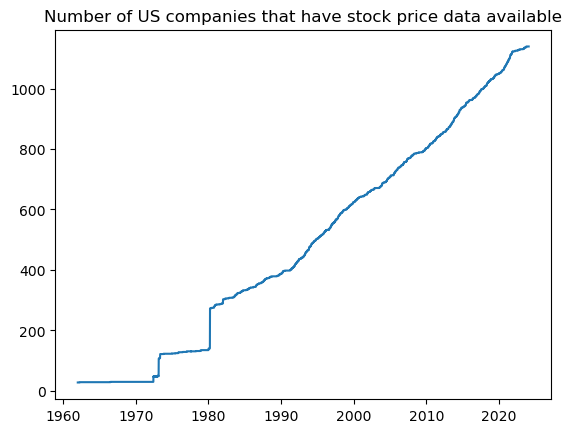

In [25]:
plt.plot(num_datapoint);
plt.title('Number of US companies that have stock price data available');

# Get US liability data

In [26]:
isin = ', '.join(list(listed_US_dollar_df['SP_ISIN']))

In [29]:
isin

'US88579Y1010, US0003611052, US0028241000, US00287Y1091, US0028962076, US00402L1070, US00404A1097, US00081T1088, US0044981019, US00508Y1029, US0050981085, US00653Q1022, US00676P1075, US00724F1012, US00090Q1031, US00737L1035, US00751Y1064, US00790R1041, US0079031078, US00791N1028, US00766T1007, US0082521081, US0010551028, US0010841023, US00846U1016, US00848J1043, US0084921008, US00912X3026, US0091581068, US00922R1059, US00971T1016, US0116591092, US0126531013, US0130911037, US0138721065, US0152711091, US01748X1028, US01749D1054, US0185223007, US01877R1086, US0188021085, US02005N1000, US0207641061, US02079K3059, US02128L1061, US02156B1035, US02156K1034, US02209S1033, US0231351067, US00165C3025, US00164V1035, GB0022569080, US0236081024, US02376R1023, US0240131047, US0240611030, US0255371017, US0256762065, US0258161092, US0259321042, US02665T3068, US0268747849, US02913V1035, US0298991011, US03027X1000, US0304201033, US03076C1062, US0311001004, US0311621009, US0316521006, US0017441017, US031

## Use the liability data retrieved from Orbis

In [33]:
US_liability_df = pd.read_excel('US listed companies total liabilities.xlsx')
US_liability_df.head()

,Company name Latin alphabet,ISIN number,Last avail. year,Total liabilities\nth USD 2023,Total liabilities\nth USD 2022,Total liabilities\nth USD 2021,Total liabilities\nth USD 2020,Total liabilities\nth USD 2019,Total liabilities\nth USD 2018,Total liabilities\nth USD 2017,...,Total liabilities\nth USD 2003,Total liabilities\nth USD 2002,Total liabilities\nth USD 2001,Total liabilities\nth USD 2000,Total liabilities\nth USD 1999,Total liabilities\nth USD 1998,Total liabilities\nth USD 1997,Total liabilities\nth USD 1996,Total liabilities\nth USD 1995,Total liabilities\nth USD 1994
0,WALMART INC.,US9311421039,2022.0,n.a.,166504000,161607000,171571000,161826000,146799000,126653000,...,61782000,55347000,48425000,46787000,44515000,28884000,26881000,22461000,22785000,20093000
1,"AMAZON.COM, INC.",US0231351067,2022.0,n.a.,316632000,282304000,227791000,163188000,119099000,103601000,...,3198140,3343263,3077547,3102420,2199572,509715,121253,4870,107,n.a.
2,EXXON MOBIL CORP,US30231G1022,2022.0,n.a.,174018000,170346000,175600000,170947000,154402000,161003000,...,84363000,78047000,70013000,78243000,81055000,77215000,76502000,79321000,75047000,74843000
3,APPLE INC.,US0378331005,2023.0,290437000,302083000,287912000,258549000,248028000,258578000,241272000,...,2592000,2203000,2101000,2696000,2057000,2647000,3033000,3306000,3330000,2919445
4,CVS HEALTH CORPORATION,US1266501006,2022.0,n.a.,157260000,157924000,161326000,158585000,138231000,57440000,...,4521300,4448300,4069400,3644900,3595700,3575600,3364300,3497300,2413799,2353884


In [34]:
year_list = []
for i in range(-2023, -1993, 1):
    year_list.append(str(-i))

In [35]:
US_liability_df.columns = ['Company name Latin alphabet', 'ISIN number', 'Last avail. year'] + year_list

In [36]:
US_liability_df.head()

,Company name Latin alphabet,ISIN number,Last avail. year,2023,2022,2021,2020,2019,2018,2017,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
0,WALMART INC.,US9311421039,2022.0,n.a.,166504000,161607000,171571000,161826000,146799000,126653000,...,61782000,55347000,48425000,46787000,44515000,28884000,26881000,22461000,22785000,20093000
1,"AMAZON.COM, INC.",US0231351067,2022.0,n.a.,316632000,282304000,227791000,163188000,119099000,103601000,...,3198140,3343263,3077547,3102420,2199572,509715,121253,4870,107,n.a.
2,EXXON MOBIL CORP,US30231G1022,2022.0,n.a.,174018000,170346000,175600000,170947000,154402000,161003000,...,84363000,78047000,70013000,78243000,81055000,77215000,76502000,79321000,75047000,74843000
3,APPLE INC.,US0378331005,2023.0,290437000,302083000,287912000,258549000,248028000,258578000,241272000,...,2592000,2203000,2101000,2696000,2057000,2647000,3033000,3306000,3330000,2919445
4,CVS HEALTH CORPORATION,US1266501006,2022.0,n.a.,157260000,157924000,161326000,158585000,138231000,57440000,...,4521300,4448300,4069400,3644900,3595700,3575600,3364300,3497300,2413799,2353884


## Convert `n.a.` to null values

In [37]:
for i in range(US_liability_df.shape[0]):
    for j in range(US_liability_df.shape[1]):
        if US_liability_df.iloc[i,j] == 'n.a.':
            US_liability_df.iloc[i,j]= np.nan

In [38]:
US_liability_df.head()

,Company name Latin alphabet,ISIN number,Last avail. year,2023,2022,2021,2020,2019,2018,2017,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
0,WALMART INC.,US9311421039,2022.0,NaN,166504000,161607000,171571000,161826000,146799000,126653000,...,61782000,55347000,48425000,46787000,44515000,28884000,26881000,22461000,22785000,20093000
1,"AMAZON.COM, INC.",US0231351067,2022.0,NaN,316632000,282304000,227791000,163188000,119099000,103601000,...,3198140,3343263,3077547,3102420,2199572,509715,121253,4870,107,NaN
2,EXXON MOBIL CORP,US30231G1022,2022.0,NaN,174018000,170346000,175600000,170947000,154402000,161003000,...,84363000,78047000,70013000,78243000,81055000,77215000,76502000,79321000,75047000,74843000
3,APPLE INC.,US0378331005,2023.0,290437000,302083000,287912000,258549000,248028000,258578000,241272000,...,2592000,2203000,2101000,2696000,2057000,2647000,3033000,3306000,3330000,2919445
4,CVS HEALTH CORPORATION,US1266501006,2022.0,NaN,157260000,157924000,161326000,158585000,138231000,57440000,...,4521300,4448300,4069400,3644900,3595700,3575600,3364300,3497300,2413799,2353884


# Check liability data availability

## Number of companies that have liability data available

In [39]:
num_com_datapoint = np.sum(US_liability_df[year_list].notnull(), axis = 1)

In [40]:
sum(num_com_datapoint != 0)

1013

## Data availability in terms of years

In [41]:
num_year_datapoint = np.sum(US_liability_df[year_list].notnull(), axis = 0)

In [42]:
num_year_datapoint.sort_index(inplace = True)

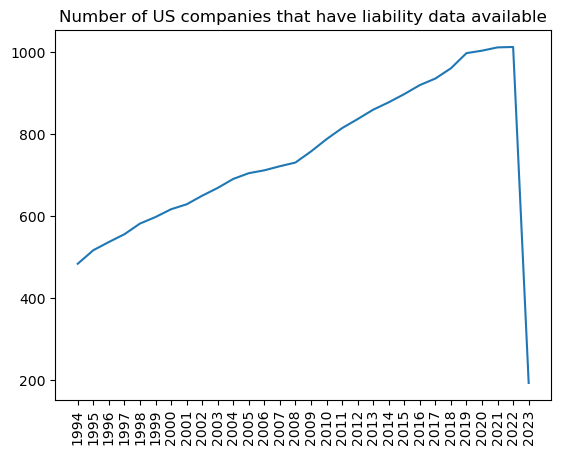

In [43]:
plt.plot(num_year_datapoint);
plt.title('Number of US companies that have liability data available');
plt.xticks(year_list, rotation = 90);